In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

In [33]:
with open('zomato.csv', 'rb') as file:
    content = file.read()
    encoding = chardet.detect(content)['encoding']
    print(encoding)
    

MacRoman


In [34]:
zomato = pd.read_csv('zomato.csv', encoding = 'mac_roman')
print(zomato.head())
print(f"Rows are {zomato.shape[0]}, Cols are {zomato.shape[1]}")

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [35]:
zomato.columns 

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [36]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [37]:
zomato.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


### Data Analysis Steps
1. Missing Values
2. Explore about Numerical Variables
3. Explore Catagorical Variables
4. Find relation between features

In [38]:
zomato.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [39]:
print([features for features in zomato.columns if zomato[features].isnull().sum() >= 1])

['Cuisines']


In [40]:
sns.heatmap(zomato.isnull(), cbar = True, xticklabels = True,yticklabels= True)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001324CA36520> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [41]:
country = pd.read_excel('Country-Code.xlsx')
country.columns

Index(['Country Code', 'Country'], dtype='object')

In [42]:
print([(x,y) for x,y in zip(zomato.columns,country.columns) if x == y] )
print([(x,y) for x,y in zip(zomato.columns,country.columns) if x != y] )
print(zomato.columns.tolist())
print(country.columns.tolist())

[]
[('Restaurant ID', 'Country Code'), ('Restaurant Name', 'Country')]
['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']
['Country Code', 'Country']


In [43]:
common_cols = set(zomato.columns) & set(country.columns)
print("Common columns:", list(common_cols))
print("\nColumns only in zomato:", list(set(zomato.columns) - set(country.columns)))
print("\nColumns only in country_code:", list(set(country.columns) - set(zomato.columns)))

Common columns: ['Country Code']

Columns only in zomato: ['Latitude', 'Votes', 'Longitude', 'City', 'Is delivering now', 'Aggregate rating', 'Has Table booking', 'Average Cost for two', 'Address', 'Price range', 'Locality Verbose', 'Locality', 'Currency', 'Switch to order menu', 'Rating text', 'Restaurant Name', 'Rating color', 'Has Online delivery', 'Restaurant ID', 'Cuisines']

Columns only in country_code: ['Country']


In [44]:
##Country code is common in two dataframes so why not merge them.
[(x,y) for x,y in zip(zomato['Country Code'].values,country['Country Code'].values) if x != y]

[(np.int64(162), np.int64(1)),
 (np.int64(162), np.int64(14)),
 (np.int64(162), np.int64(30)),
 (np.int64(162), np.int64(37)),
 (np.int64(162), np.int64(94)),
 (np.int64(162), np.int64(148)),
 (np.int64(162), np.int64(166)),
 (np.int64(162), np.int64(184)),
 (np.int64(162), np.int64(189)),
 (np.int64(162), np.int64(191)),
 (np.int64(162), np.int64(208)),
 (np.int64(162), np.int64(214)),
 (np.int64(162), np.int64(215)),
 (np.int64(162), np.int64(216))]

In [46]:
print(pd.merge(zomato, country, how = 'left', on = 'Country Code').columns)
print(zomato.columns)
print(country.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')
Index(['Country Code', 'Country'], dtype='object')


In [47]:
final = pd.merge(zomato, country, how = 'left', on = 'Country Code')
final.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [48]:
final.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [ ]:
final.Country.value_counts()
## This data is not presentable let's make it presentable with pie chart

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

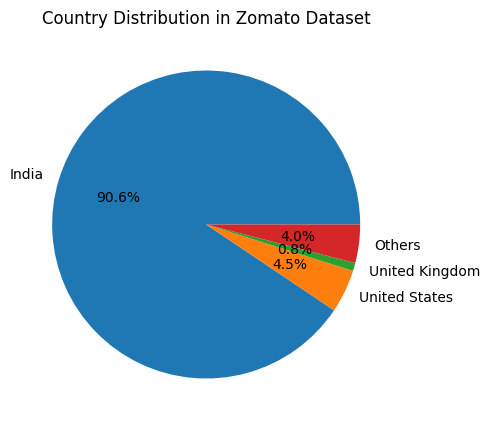

In [52]:
country_names = final.Country.value_counts().index[:3]
country_values = final.Country.value_counts().values[:3]
other_values = final.Country.value_counts().values[3:].sum()
plot_values = np.append(country_values, other_values)
plot_lables = np.append(country_names, 'Others')

plt.figure(figsize=(5, 5))
plt.pie(plot_values, labels = plot_lables, autopct = '%1.1f%%')
plt.title('Country Distribution in Zomato Dataset')
plt.show()

Hence, Zomato has major service in India.

In [53]:
final.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

## Analysis of platform's rating

In [62]:
rating = final.groupby(['Aggregate rating', 'Rating color','Rating text']).size().reset_index().rename(columns = {0 : 'Review Count'})
rating

,Aggregate rating,Rating color,Rating text,Review Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


#### Let's analyse the review count and their respective rating

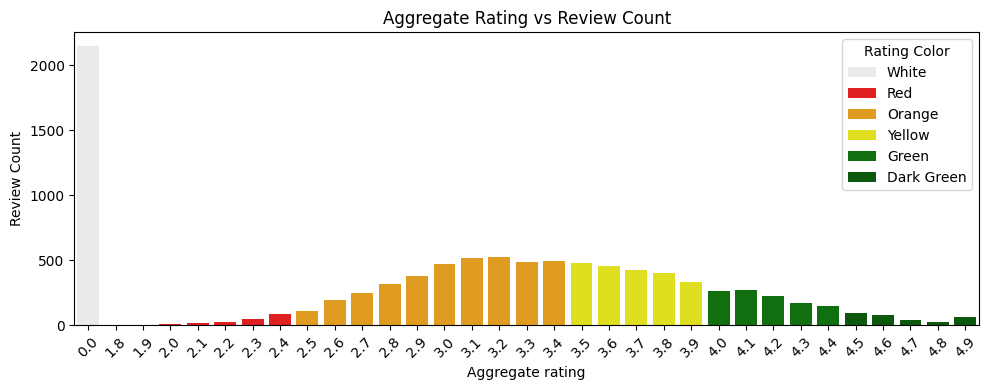

In [90]:
# Create barplot with correct color mapping
plt.figure(figsize=(10,4))
sns.barplot(x='Aggregate rating', 
        y='Review Count', 
        data=rating, 
        hue='Rating color', 
        palette={'White': "#EAEAEAFF",
                'Red': '#FF0000',
                'Orange': '#FFA500',
                'Yellow': '#FFFF00',
                'Green': '#008000',
                'Dark Green': '#006400'})

# Customize the plot
plt.title('Aggregate Rating vs Review Count')
plt.legend(title='Rating Color')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Observatons : 
1. Maximum users are not rating.
2. Maximum rating are between 3 - 3.4 => Zomato is a average platform 

In [94]:
## Countries with zero ratings
final[final['Aggregate rating'] == 0].groupby('Country').size().reset_index(name='Count')

,Country,Count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


India is the country where maximum people are not reviewing reaview ratio = 2139/8652 = 0.247 ~ 25% customer 
are not reviewing

In [99]:
## Countries where online delivries are not available 
final[final['Has Online delivery'] == 'Yes'].groupby(['Country']).size().reset_index(name='Count')

,Country,Count
0,India,2423
1,UAE,28


In [100]:
final[final['Has Online delivery'] == 'No'].groupby(['Country']).size().reset_index(name='Count')

,Country,Count
0,Australia,24
1,Brazil,60
2,Canada,4
3,India,6229
4,Indonesia,21
5,New Zealand,40
6,Phillipines,22
7,Qatar,20
8,Singapore,20
9,South Africa,60


In [101]:
final[final['Has Online delivery'] == 'No'].groupby(['Country','City']).size().reset_index(name='Count')

,Country,City,Count
0,Australia,Armidale,1
1,Australia,Balingup,1
2,Australia,Beechworth,1
3,Australia,Dicky Beach,1
4,Australia,East Ballina,1
...,...,...,...
135,United States,Valdosta,20
136,United States,Vernonia,1
137,United States,Waterloo,20
138,United States,Weirton,1


In [102]:
final[(final['Has Online delivery'] == 'No') & (final['Country'] == 'India')].groupby(['City']).size().reset_index(name='Count')

,City,Count
0,Agra,20
1,Ahmedabad,10
2,Allahabad,20
3,Amritsar,21
4,Aurangabad,20
5,Bangalore,13
6,Bhopal,20
7,Bhubaneshwar,21
8,Chandigarh,12
9,Chennai,7


##### Observation : 
1. Only India and UAE have online deliveries by Zomato
2. There are many instances in India and UAE itself where online delivery can't be accessed

### Let's focus on Cuisines with Rating

In [105]:
final.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [109]:
final['Cuisines'].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      shape=(1826,), dtype=object)

We need to remove ' form every name

In [ ]:
cuisines = final.copy(deep=True)


In [114]:
cuisines.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [120]:
cuisines['Cuisines'] = cuisines['Cuisines'].str.replace("'", "", regex=True)

In [121]:
cuisines['Cuisines'].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      shape=(1826,), dtype=object)

' is not getting removed trying other methods

In [122]:
sample = cuisines['Cuisines'].iloc[0]
print(sample)

French, Japanese, Desserts


In [126]:
cuisines['Cuisines'].dtype
cuisines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [136]:
cuisines['Cuisines'] = cuisines['Cuisines'].astype('string')
print(type(cuisines['Cuisines'].iloc[0]))

<class 'str'>


In [137]:
cuisines['Cuisines'].unique()

<StringArray>
[        'French, Japanese, Desserts',                           'Japanese',
   'Seafood, Asian, Filipino, Indian',                    'Japanese, Sushi',
                   'Japanese, Korean',                            'Chinese',
                    'Asian, European', 'Seafood, Filipino, Asian, European',
            'European, Asian, Indian',                           'Filipino',
 ...
       'Kebab, Turkish Pizza, DÌ_ner',                      'Turkish Pizza',
     'Kebab, Desserts, Turkish Pizza',          'Restaurant Cafe, Desserts',
 'Restaurant Cafe, Turkish, Desserts',                    'Restaurant Cafe',
                   'Desserts, BÌ_rek',                     'Burger, Izgara',
    'World Cuisine, Patisserie, Cafe',             'Italian, World Cuisine']
Length: 1826, dtype: string

In [138]:
cuisines['Cuisines'] = cuisines['Cuisines'].str.replace("'", "", regex=True)

In [139]:
cuisines['Cuisines'].unique()

<StringArray>
[        'French, Japanese, Desserts',                           'Japanese',
   'Seafood, Asian, Filipino, Indian',                    'Japanese, Sushi',
                   'Japanese, Korean',                            'Chinese',
                    'Asian, European', 'Seafood, Filipino, Asian, European',
            'European, Asian, Indian',                           'Filipino',
 ...
       'Kebab, Turkish Pizza, DÌ_ner',                      'Turkish Pizza',
     'Kebab, Desserts, Turkish Pizza',          'Restaurant Cafe, Desserts',
 'Restaurant Cafe, Turkish, Desserts',                    'Restaurant Cafe',
                   'Desserts, BÌ_rek',                     'Burger, Izgara',
    'World Cuisine, Patisserie, Cafe',             'Italian, World Cuisine']
Length: 1826, dtype: string

In [ ]:
for i in range(len(cuisines['Cuisines'])):
    string = cuisines['Cuisines'].iloc[i].split(',')
    for j in range(len(string)):

In [142]:
cuisines['Cuisines'].head(2)

0    French, Japanese, Desserts
1                      Japanese
Name: Cuisines, dtype: string

In [144]:
cuisines.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines


So this implies combination of cuisines describes a Restaurant.

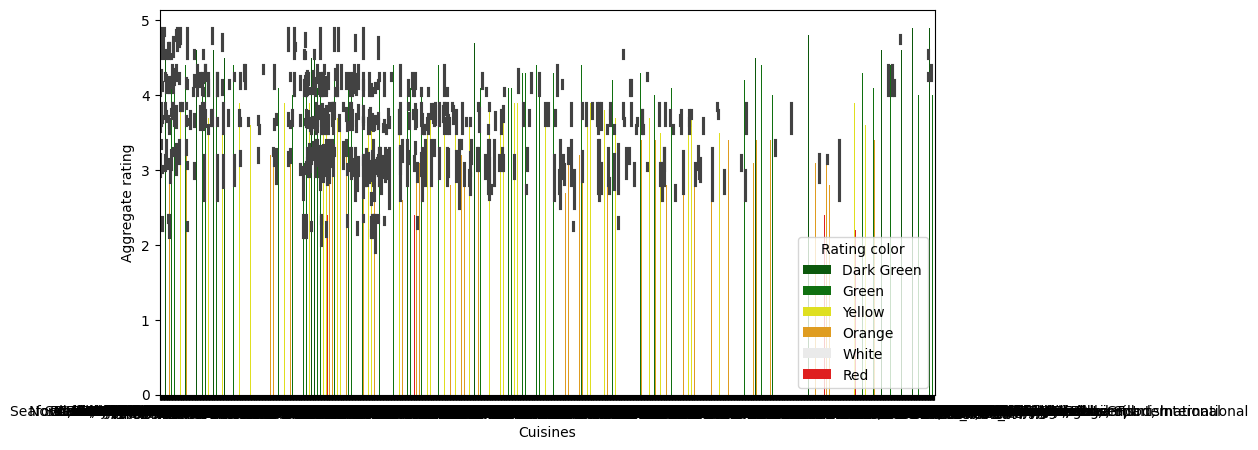

In [146]:
plt.figure(figsize=(10, 5))
sns.barplot(x = 'Cuisines', y= 'Aggregate rating', data=cuisines, hue=cuisines['Rating color'], palette = {'White': "#EAEAEAFF",
                'Red': '#FF0000',
                'Orange': '#FFA500',
                'Yellow': '#FFFF00',
                'Green': '#008000',
                'Dark Green': '#006400'})
plt.show()

In [147]:
cuisines.groupby(['Cuisines','Aggregate rating', 'Rating color']).size().reset_index(name='Count')

,Cuisines,Aggregate rating,Rating color,Count
0,Afghani,0.0,White,3
1,Afghani,2.9,Orange,1
2,"Afghani, Mughlai, Chinese",0.0,White,1
3,"Afghani, North Indian",0.0,White,1
4,"Afghani, North Indian, Pakistani, Arabian",0.0,White,1
...,...,...,...,...
3924,nan,3.4,Orange,3
3925,nan,3.8,Yellow,1
3926,nan,3.9,Yellow,3
3927,nan,4.4,Green,1


In [148]:
cuisines['Cuisines'].isnull().sum()

np.int64(0)